### Natural Language Processing with Python -> Spam Filter

In [1]:
import nltk

In [3]:
# nltk.download_shell()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> stopwords
        C:\Users\Magali\AppData\Roaming\nltk_data...
      Unzipping corpora\stopwords.zip.

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


In [2]:
messages = [line.rstrip() for line in open('smsspamcollection/SMSSpamCollection')]

In [3]:
print(len(messages))

5574


In [4]:
messages[30]

"ham\tWait that's still not all that clear, were you not sure about me being sarcastic or that that's why x doesn't want to live with us"

In [5]:
for mess_no, message in enumerate(messages[0:10]):
    print(mess_no)
    print('\n')
    print(message)

0


ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
1


ham	Ok lar... Joking wif u oni...
2


spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3


ham	U dun say so early hor... U c already then say...
4


ham	Nah I don't think he goes to usf, he lives around here though
5


spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv
6


ham	Even my brother is not like to speak with me. They treat me like aids patent.
7


ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune
8


spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim c

In [6]:
import pandas as pd

In [7]:
messages = pd.read_csv('smsspamcollection/SMSSpamCollection', sep='\t', names=['labels', 'message'])

In [8]:
messages.head()

,labels,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
messages.groupby('labels').describe()

message                                                               
         count unique                                                top freq
labels                                                                       
ham       4825   4516                             Sorry, I'll call later   30
spam       747    653  Please call our customer service representativ...    4

In [10]:
messages['length'] = messages['message'].apply(len)

In [11]:
messages.head()

,labels,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [12]:
import matplotlib as plt
import seaborn as sns
%matplotlib inline

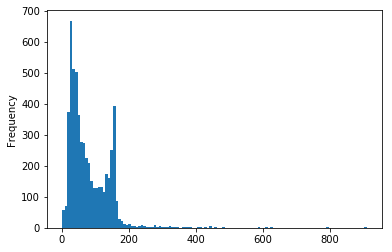

In [13]:
messages['length'].plot.hist(bins=120)

In [14]:
messages['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [15]:
messages[messages['length']==910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000176671D3470>,
      dtype=object)

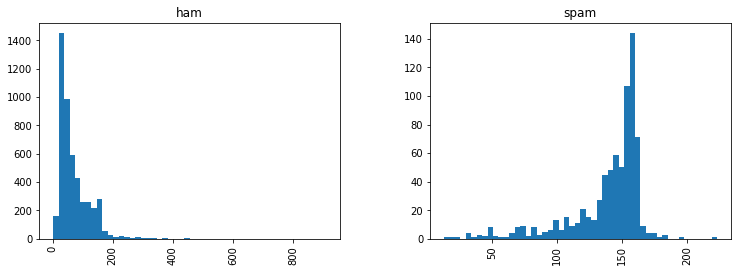

In [16]:
messages.hist(column='length',by='labels',bins=50, figsize=(12,4))

We can see that length is a good feature to compare ham and spam messages.

Another numerical feature we could use is 'Bag of words'

In [17]:
import string

In [18]:
mess = 'Sample Message! Notice: it has ponctuation.'

In [19]:
nopunc = [c for c in mess if c not in string.punctuation]

In [20]:
from nltk.corpus import stopwords

In [21]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [22]:
nopunc = ''.join(nopunc)

In [23]:
nopunc.split()

['Sample', 'Message', 'Notice', 'it', 'has', 'ponctuation']

In [24]:
clean_mess = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [25]:
clean_mess

['Sample', 'Message', 'Notice', 'ponctuation']

In [26]:
def text_process(mess):
    """
    1. remove punc
    2. remove stopwords
    3. return list of clean words
    """
    nopunc = [char for char in mess if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return[word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [27]:
messages['message'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

### Let's start with vector count, which is basicaly counting the occurences of every words in every messages :

In [28]:
from sklearn.feature_extraction.text import CountVectorizer

In [30]:
bow_transformer = CountVectorizer(analyzer = text_process).fit(messages['message'])

In [33]:
print(len(bow_transformer.vocabulary_))

11425


There is 11.425 unique words in our messages, after removing punctuation and stop words.

In [34]:
mess4 = messages['message'][3]


In [37]:
bow4 = bow_transformer.transform([mess4])

In [38]:
print(mess4)
print(bow4)

U dun say so early hor... U c already then say...
  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


There is 7 unique words and two appears twice.

In [43]:
print(bow_transformer.get_feature_names()[4068])
bow_transformer.get_feature_names()[9554]

U


'say'

In [45]:
messages_bow = bow_transformer.transform(messages['message']) # return a sparse matrix of our bow transformer

In [47]:
print('Shape of the SParse Matrix : ', messages_bow.shape)

Shape of the SParse Matrix :  (5572, 11425)


In [48]:
print('Amount of non zeros occurencies : ', messages_bow.nnz)

Amount of non zeros occurencies :  50548


In [50]:
sparsity = (100.0 * messages_bow.nnz / (messages_bow.shape[0]*messages_bow.shape[1]))
print('Sparsity : {}'.format(sparsity))

Sparsity : 0.07940295412668218


### Let'ss have a look on the weight of each words in function of their occurences.

This is done with the inverse document frequency :

In [51]:
from sklearn.feature_extraction.text import TfidfTransformer

In [52]:
tfidf_transformer = TfidfTransformer().fit(messages_bow)

In [53]:
tfidf4 = tfidf_transformer.transform(bow4)

In [54]:
print(tfidf4)

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


So what is TF-IDF?
TF-IDF stands for term frequency-inverse document frequency, and the tf-idf weight is a weight often used in information retrieval and text mining. This weight is a statistical measure used to evaluate how important a word is to a document in a collection or corpus. The importance increases proportionally to the number of times a word appears in the document but is offset by the frequency of the word in the corpus. Variations of the tf-idf weighting scheme are often used by search engines as a central tool in scoring and ranking a document's relevance given a user query.

One of the simplest ranking functions is computed by summing the tf-idf for each query term; many more sophisticated ranking functions are variants of this simple model.

Typically, the tf-idf weight is composed by two terms: the first computes the normalized Term Frequency (TF), aka. the number of times a word appears in a document, divided by the total number of words in that document; the second term is the Inverse Document Frequency (IDF), computed as the logarithm of the number of the documents in the corpus divided by the number of documents where the specific term appears.

TF: Term Frequency, which measures how frequently a term occurs in a document. Since every document is different in length, it is possible that a term would appear much more times in long documents than shorter ones. Thus, the term frequency is often divided by the document length (aka. the total number of terms in the document) as a way of normalization:

TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document).

IDF: Inverse Document Frequency, which measures how important a term is. While computing TF, all terms are considered equally important. However it is known that certain terms, such as "is", "of", and "that", may appear a lot of times but have little importance. Thus we need to weigh down the frequent terms while scale up the rare ones, by computing the following:

IDF(t) = log_e(Total number of documents / Number of documents with term t in it).

See below for a simple example.

Example:

Consider a document containing 100 words wherein the word cat appears 3 times.

The term frequency (i.e., tf) for cat is then (3 / 100) = 0.03. Now, assume we have 10 million documents and the word cat appears in one thousand of these. Then, the inverse document frequency (i.e., idf) is calculated as log(10,000,000 / 1,000) = 4. Thus, the Tf-idf weight is the product of these quantities: 0.03 * 4 = 0.12.

### Let's check the inverse document frequency of a specific word :

In [56]:
tfidf_transformer.idf_[bow_transformer.vocabulary_['university']]

8.527076498901426

In [57]:
messages_tfidf = tfidf_transformer.transform(messages_bow)

### Let's train our Spam/Ham model :

In [58]:
from sklearn.naive_bayes import MultinomialNB

In [59]:
spam_detect_model = MultinomialNB().fit(messages_tfidf, messages['labels'])

In [60]:
spam_detect_model.predict(tfidf4)[0]

'ham'

In [61]:
messages['labels'][3]

'ham'

In [62]:
all_pred = spam_detect_model.predict(messages_tfidf)

In [63]:
all_pred

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype='<U4')

Let's train test split oour data :

In [64]:
from sklearn.cross_validation import train_test_split

In [65]:
msg_train,msg_test, label_train, label_test = train_test_split(messages['message'], messages['labels'], test_size =0.3)

In this example, we don't process the text and did Ifidf, this is such a common action that sklearn has a data pipeline feature for this :

In [67]:
from sklearn.pipeline import Pipeline

In [75]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),
    ('Tfidf', TfidfTransformer()),
    ('Classifier', MultinomialNB())
])
# We can use anything we want in this pipeline, any process function, any analyser, etc ...

In [69]:
pipeline.fit(msg_train,label_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x00000176673BABF8>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocesso...f=False, use_idf=True)), ('Classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [72]:
pred = pipeline.predict(msg_test)

In [71]:
from sklearn.metrics import classification_report, confusion_matrix

In [73]:
print(classification_report(label_test, pred))
print('\n')
print(confusion_matrix(label_test, pred))

             precision    recall  f1-score   support

        ham       0.96      1.00      0.98      1434
       spam       1.00      0.73      0.84       238

avg / total       0.96      0.96      0.96      1672



[[1434    0]
 [  64  174]]
